# Build CNN Model from Scratch

In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import os
import random
import shutil
import matplotlib.pyplot as plt 
import glob
import warnings

# Data Preperation

In [2]:
os.chdir('data/train')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for c in random.sample(glob.glob('cat*'), 300):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('dog*'), 300):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, 'test/dog')
os.chdir('../../')

In [16]:
train_path = "data/train/train"
valid_path = 'data/train/valid'
test_path = 'data/train/test'

In [20]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10, classes=['cat', 'dog'])

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory = valid_path, target_size=(224,224), batch_size=10, classes=['cat', 'dog'])

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory = test_path, target_size=(224,224), batch_size=10, classes=['cat', 'dog'])


Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [28]:
assert train_batches.n==600
assert valid_batches.n==200
assert test_batches.n==100
assert train_batches.num_classes == valid_batches.num_classes== test_batches.num_classes==2

In [31]:
imgs, labels = next(train_batches)

In [34]:
def PlotImages(images_arr):
    fig,axes = plt.subplots(1,20, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(imgs)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print(labels)

In [36]:
print(labels)


[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [41]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(2, activation='softmax'),

])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_2 (Dense)             (None, 2)                

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
60/60 - 36s - loss: 51.2909 - accuracy: 0.5500 - val_loss: 0.7266 - val_accuracy: 0.6000 - 36s/epoch - 606ms/step
Epoch 2/10
60/60 - 31s - loss: 0.4579 - accuracy: 0.7767 - val_loss: 0.7861 - val_accuracy: 0.6100 - 31s/epoch - 517ms/step
Epoch 3/10
60/60 - 36s - loss: 0.2431 - accuracy: 0.9283 - val_loss: 0.8707 - val_accuracy: 0.5900 - 36s/epoch - 601ms/step
Epoch 4/10
60/60 - 37s - loss: 0.0982 - accuracy: 0.9833 - val_loss: 1.0696 - val_accuracy: 0.6150 - 37s/epoch - 612ms/step
Epoch 5/10
60/60 - 30s - loss: 0.0321 - accuracy: 0.9967 - val_loss: 1.3198 - val_accuracy: 0.5650 - 30s/epoch - 494ms/step
Epoch 6/10
60/60 - 30s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.4669 - val_accuracy: 0.5750 - 30s/epoch - 506ms/step
Epoch 7/10
60/60 - 33s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.7455 - val_accuracy: 0.5850 - 33s/epoch - 547ms/step
Epoch 8/10
60/60 - 35s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.8752 - val_accuracy: 0.5650 - 35s/epoch - 583ms/step
Epoch 9

In [44]:
test_imgs, test_labels = next(test_batches)

In [54]:
import numpy as np
predictions = model.predict(x=test_batches, verbose=0)
print(np.round(predictions))

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [55]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
cm = confusion_matrix(y_true= test_batches.classes , y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['cat','dog']

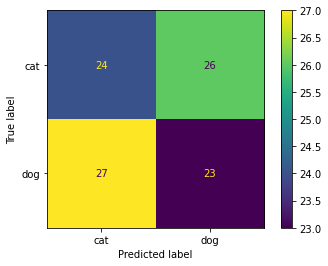

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_plot_labels)
disp.plot()
plt.show()

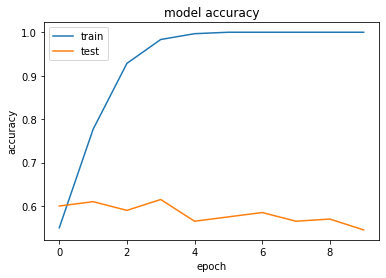

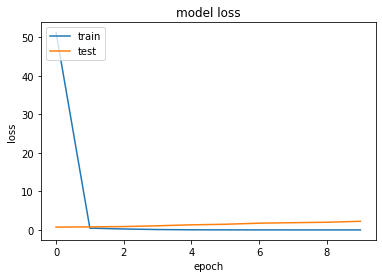

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()